In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
train = pd.read_csv('titanic_train.csv')

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

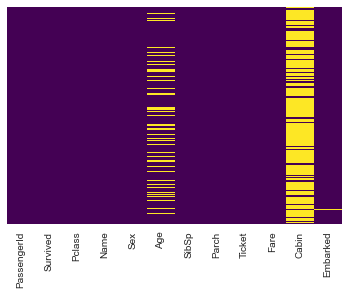

In [50]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#Amount of Null data

In [51]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

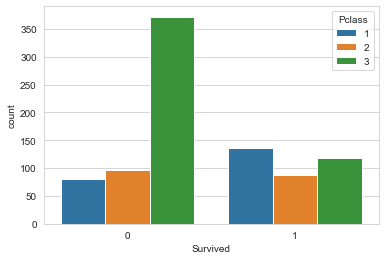

In [52]:
sns.countplot(x='Survived',hue='Pclass', data=train)
#Those in different classes that survived

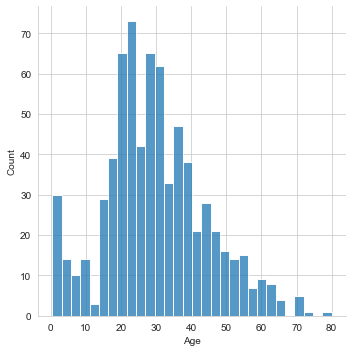

In [53]:
sns.displot(train['Age'].dropna(),kde=False,bins=30)
# Distribution of ages onboard

<AxesSubplot:ylabel='Frequency'>

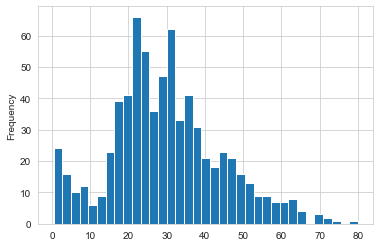

In [54]:
train['Age'].plot.hist(bins=35)
#Age of those onboard

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

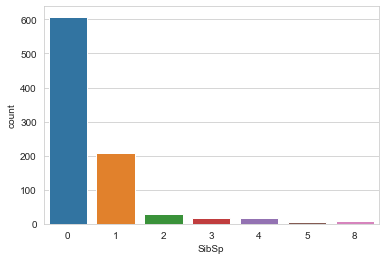

In [56]:
sns.countplot(x='SibSp',data=train)
#Sibling vs Spouses

<AxesSubplot:>

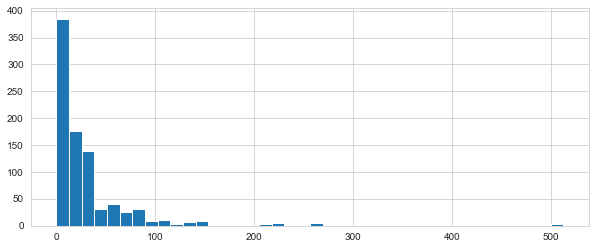

In [57]:
train['Fare'].hist(bins=40,figsize=(10,4))
#Fare prices

In [58]:
import cufflinks as cf

In [59]:
cf.go_offline()

In [60]:
#train['Fare'].iplot(kind='hist',bins=50)
#Interacting with data using Cufflinks

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

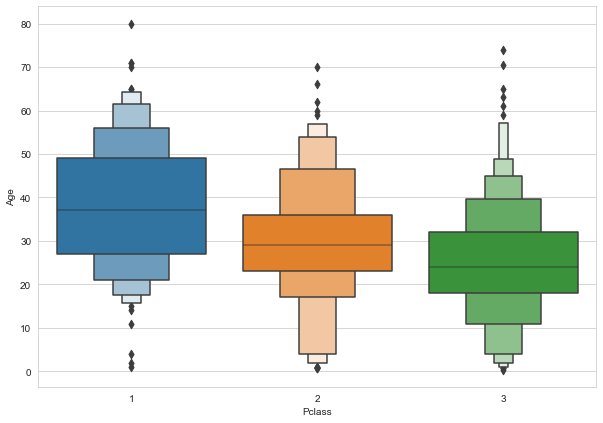

In [61]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='Pclass',y='Age',data=train)
#Box plot thats gives a good reference on the avg age of those onboard so that I can predict those null age values

In [62]:
#Function to predict age
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [63]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
#Apply prediction to cols

<AxesSubplot:>

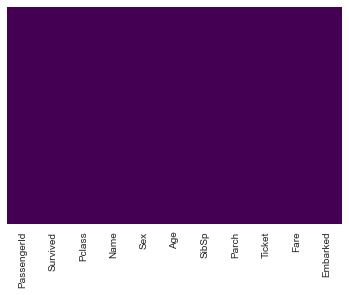

In [70]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#No missing age

In [ ]:
#Dropping cab col
train.drop('Cabin', axis=1,inplace=True)

In [69]:
#Removing all Null values
train.dropna(inplace=True)